# Data preprocessing

## Importing libraries, cloning the repository and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')

## Exploratory analysis

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Number of (0) passengers who did not survive; (1) number of passengers who survived
np.unique(train['Survived'], return_counts=True)

(array([0, 1]), array([549, 342]))

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The 'Age' column has 177 NaN values, so these NaNs will be replaced for the median. For the 'Cabin', I chose to remove this column, because not only does it have many NaN values but we can also infer whether the cabin is located on a lower or higher deck based on the 'Fare' or 'Pclass' columns. Finally, for the 'Embarked' column, I will replace the two NaN values with the mode.

## Data Cleaning

In [11]:
train['Age'].fillna(train['Age'].median(), inplace=True)

C:\Users\yohan\AppData\Local\Temp\ipykernel_4384\486169235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [12]:
train.drop('Cabin', axis=1, inplace=True)

In [13]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

C:\Users\yohan\AppData\Local\Temp\ipykernel_4384\1031565505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now the train dataset does not have any NaN values or missing values.

## Data Analysis

### Categorical Variable X Survived

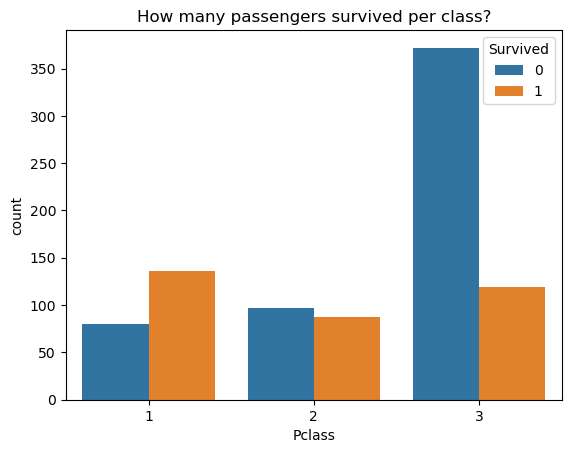

In [16]:
sns.countplot(x=train['Pclass'], hue=train['Survived']);
plt.title('How many passengers survived per class?')
plt.show()

Here we can see a clear pattern: passenger of the 3rd class have a lower survivability rate than those belonging to the 1st or 2st class.

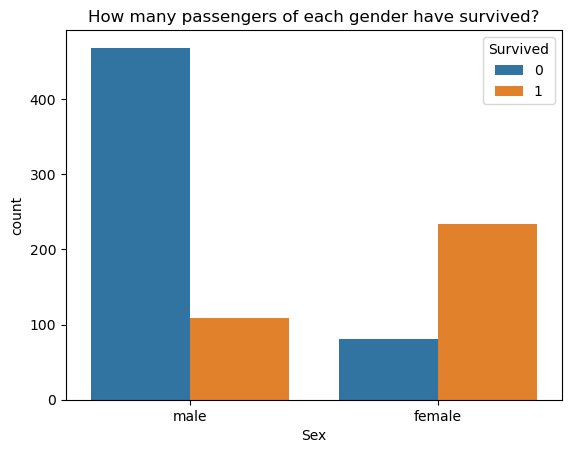

In [17]:
sns.countplot(x=train['Sex'], hue=train['Survived']);
plt.title('How many passengers of each gender have survived?')
plt.show()

Now, comparing the survivability rate of each gender, we can confirm that female passengers have a higher chance of survival

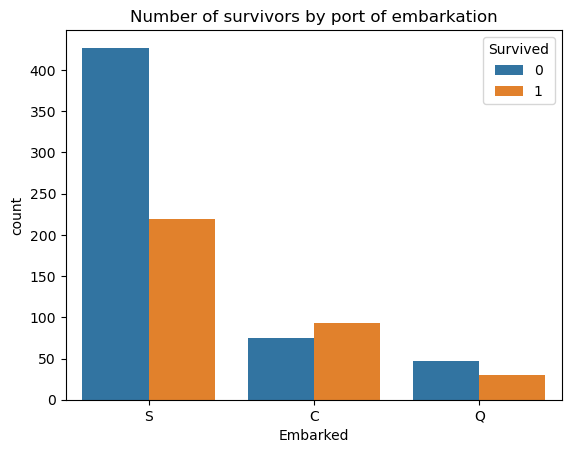

In [18]:
sns.countplot(x=train['Embarked'], hue=train['Survived']);
plt.title('Number of survivors by port of embarkation')
plt.show()

Passengers coming from Southampton have lower survivability rate compared to passengers coming from Queenstown.

### Numerical Variables X Survived

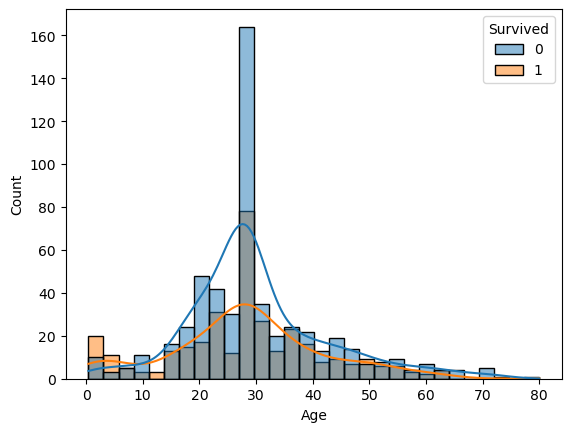

In [19]:
sns.histplot(x=train['Age'], hue=train['Survived'], kde=True);

Comparing the survivability by age, we see there is only one point where the number of survivors is higher than or equal to the number of deaths. This occurs in children aged 10 years or younger. This confirms that the protocol 'women and children first' was followed.

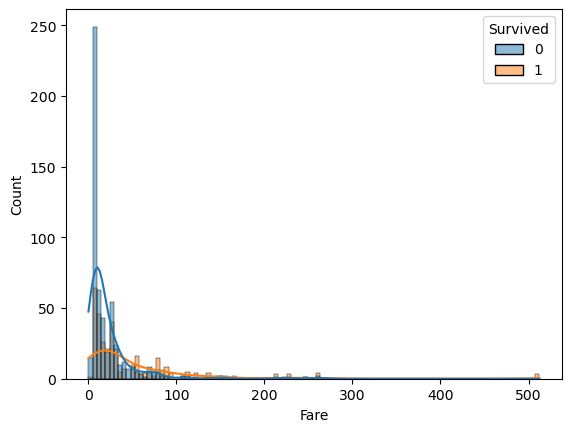

In [20]:
sns.histplot(x=train['Fare'], hue=train['Survived'], kde=True);

Ticket fare gives us a proxy for socio-economic status and passenger class. Passengers in 1st Class had cabins on the upper decks, giving them easier and faster access to the lifeboats. On the other hand, passengers in 3rd Class had cabins on the lower decks, making their escape far more difficult.

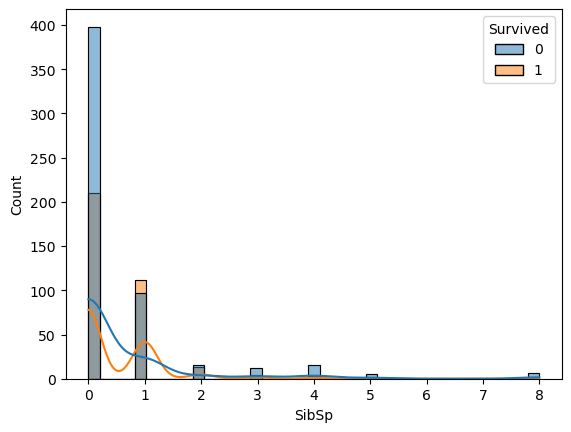

In [21]:
sns.histplot(x=train['SibSp'], hue=train['Survived'], kde=True);

The graph shows that passengers who traveled alone (SibSp = 0) had a low survival rate. A probable explanation for this is the lack of support during the evacuation. For the passengers who traveled with one companion (SibSp = 1), the survival rate was the highest, probably due to the mutual support to evacuate the ship. Finally, those who traveled in larger families (SibSp >= 2), the survival rate drops sharply; this may be because coordinating the evacuation of a larger family was more difficult and time-consuming.

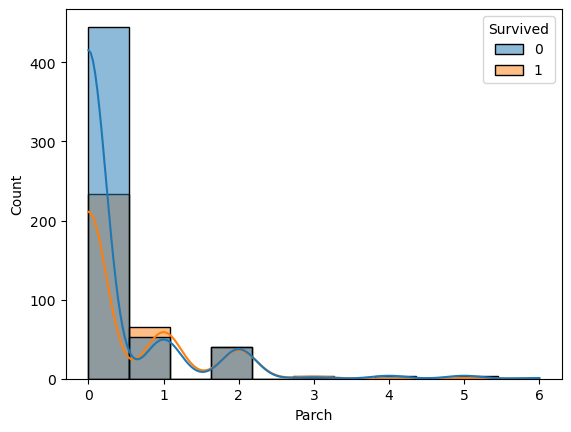

In [22]:
sns.histplot(x=train['Parch'], hue=train['Survived'], kde=True);

Survival by Family Size (Parents/Children - Parch)

This graph shows that survival rates varied based on the number of parents or children (Parch) a passenger had on board.

    Traveling without Dependents (Parch = 0): Passengers traveling without parents or children had a lower survival rate.

    Small Families (Parch = 1 or 2): This was the "sweet spot." Traveling with one or two family members in a parent/child relationship offered the highest chance of survival.

    Large Families (Parch >= 3): The survival rate dropped significantly for larger families, likely due to the difficulty of keeping the group together and evacuating.

### Relationship between variables

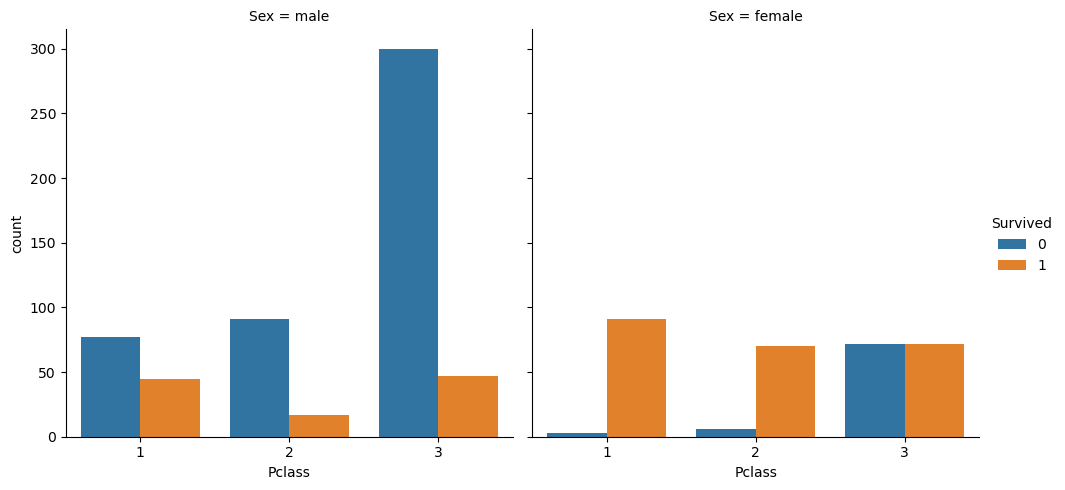

In [23]:
sns.catplot(x=train['Pclass'], hue=train['Survived'], col=train['Sex'], kind="count");

Survival by Sex and Passenger Class

This chart provides a decisive look at how gender and social class were the two most critical factors for survival on the Titanic.

    Gender was the primary factor: The "women and children first" rule is clearly visible. Women had a vastly higher survival rate than men, regardless of class.

    Class was the secondary factor: Within each gender, a higher class meant a better chance of survival. First-class passengers had better odds than second-class, who in turn had better odds than third-class.

    A Woman in 3rd Class > A Man in 1st Class: The data shows that being female was a greater survival advantage than being wealthy. A woman in third class had a better chance of surviving than a man in first class.

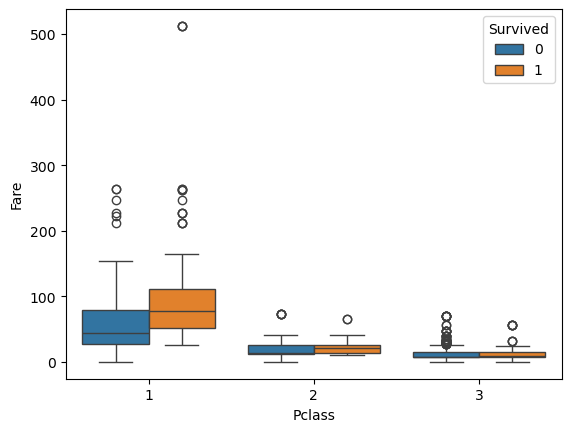

In [24]:
sns.boxplot(x=train['Pclass'], y=train['Fare'], hue=train['Survived']);

Fare, Class, and Survival: A Deeper Look

This box plot provides a statistical summary of how ticket fare related to survival within each passenger class, revealing a key nuance.

    In First Class, Money Talked: Passengers who survived in 1st Class paid a significantly higher median fare than those who did not. This suggests that more expensive tickets, which likely corresponded to better-located cabins, were correlated with a higher chance of survival.

    In 2nd & 3rd Class, Fare Was Not a Factor: For these passengers, the fare distributions for survivors and non-survivors are nearly identical. This indicates that within the middle and lower classes, the specific price of a ticket had no discernible impact on survival odds.

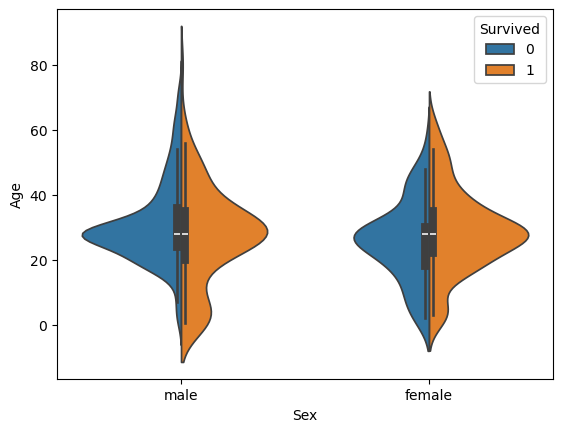

In [25]:
sns.violinplot(x=train['Sex'], y=train['Age'], hue=train['Survived'], split=True);

Age, Sex, and Survival: A Violin Plot Analysis

This split violin plot shows the age distribution for survivors (orange side) and non-survivors (blue side), separated by gender. It perfectly illustrates the "women and children first" protocol.

    Male Survivors Were Mostly Boys: The plot for males shows that while the largest group of casualties were adults aged 20-40, the survivors were overwhelmingly young boys. For an adult male, age had little bearing on their low chance of survival.

    Female Survival Was High Across Most Ages: The plot for females shows that survivors outnumbered casualties across a wide age range. Being female provided a high chance of survival, regardless of whether they were a child, a young adult, or middle-aged.

## Division between predictors and classes

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
X_predictors = train.drop(['Survived', 'Name', 'PassengerId', 'Ticket'], axis=1)
X_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [37]:
Y = train['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
X_predictors.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Analyzing the results, we observe a strong outlier in 'Fare,' so we can't use either the StandardScaler, since the maximum value of $512 would distort the mean and standard deviation calculations, or the MinMaxScaler, because this outlier would be mapped to 1, while most passengers paid around $31. Furthermore, there are still outliers in other columns such as 'Age,' 'SibSp,' and 'Parch.' Therefore, we will use the RobustScaler, which is better suited for data with outliers.